1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12420\988593181.py:19: RuntimeWarning: divide by zero encountered in divide
  poissons = 1 / counts**0.5


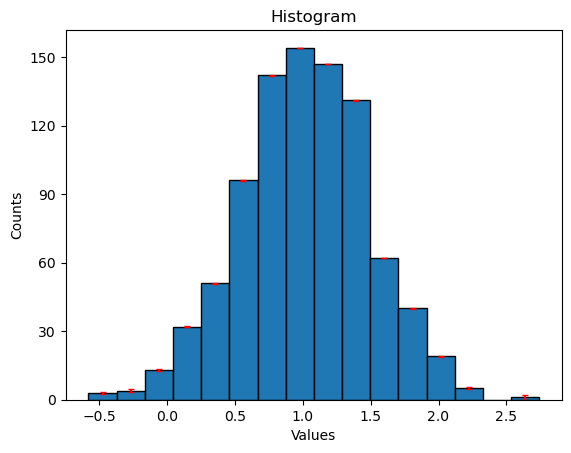

<Figure size 640x480 with 0 Axes>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Sample data
mean = 1
std = 0.5
samples = 900
data = mean + std*np.random.randn(samples)

# Create histogram
bins = 16
counts, bins = np.histogram(data, bins = bins)

centers = []
for i in range(1,bins.shape[0]):
    centers.append((bins[i] + bins[i-1]) / 2)

poissons = 1 / counts**0.5

plt.hist(data, bins=bins, edgecolor='black')  
plt.errorbar(centers, counts, yerr=poissons, fmt='none', color='red', capsize=2, label='Error Bars') #talmente piccoli che non si vedono

# Setting the elements in the plot
plt.xlabel('Values')
plt.ylabel('Counts')

step = 30
plt.yticks(np.arange(0, np.max(counts), step))

plt.title('Histogram')

# Display the histogram
plt.show()
plt.tight_layout()




Text(0, 0.5, 'Counts')

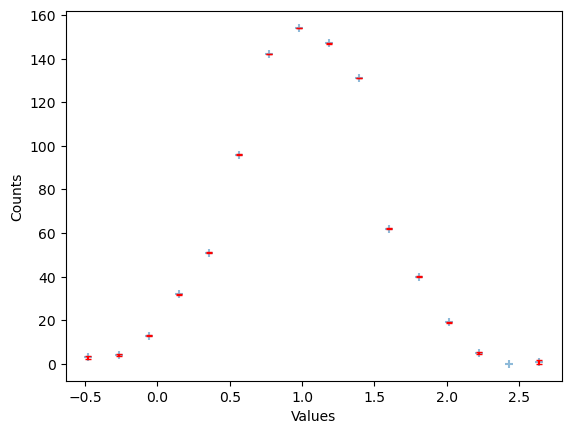

In [2]:
plt.scatter(centers, counts, marker = '+', alpha = 0.5, s=30)
plt.errorbar(centers, counts, yerr=poissons, fmt='none', color='red', capsize=2, label='Error Bars') #talmente piccoli che non si vedono
plt.xlabel('Values')
plt.ylabel('Counts')

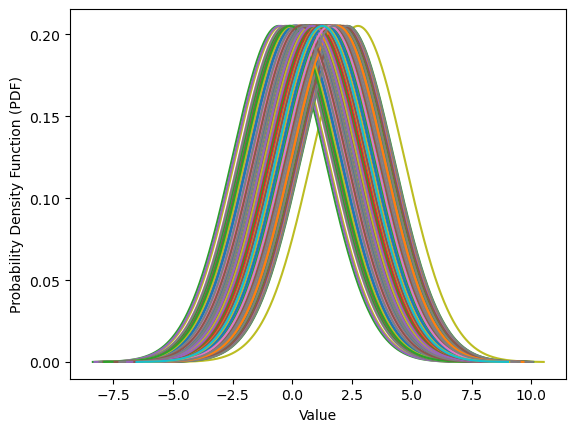

In [21]:
#SISTEMARE IN MODO DA PLOTTARLO BESIDE IL PLOT DELL'ISTOGRAMMA
from scipy.stats import norm

std_dev = 1.06 * data.std() * data.size**(1 / 5) #given formula

pdfs = []
for i in data:
    # Define the mean equal to the single sample
    mean_value = i

    # Create a normal distribution using stats.norm()
    distribution = norm(loc=mean_value, scale=std_dev)

    # Plot the probability density function (PDF) of the distribution
    x = np.linspace(mean_value - 4 * std_dev, mean_value + 4 * std_dev, 1000)
    plt.plot(x, distribution.pdf(x))

    #filling a list with all the pdfs in order to sum afterwise
    pdfs.append(distribution.pdf(x))

# Add labels 
plt.xlabel('Value')
plt.ylabel('Probability Density Function (PDF)')

# Show the plot (optional)
plt.show()

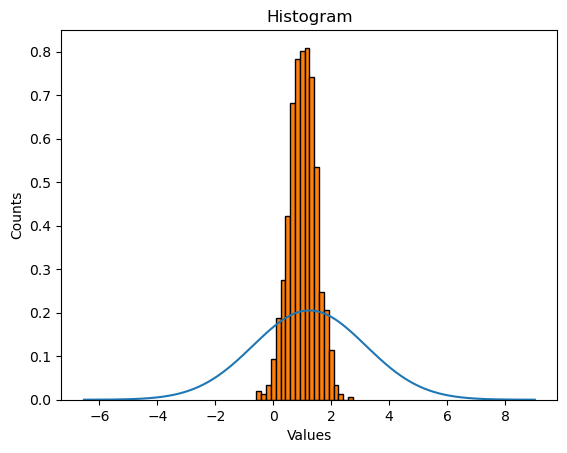

<Figure size 640x480 with 0 Axes>

In [22]:
#DA RICONTROLLARE

from scipy.integrate import trapz

#sum all the pdfs in order to obtain the one who will fit the hist
sum = np.sum(pdfs, axis=0)

#for normalization of the pdf
area = trapz(sum, x)

#plot of the resulting pdfs
plt.plot(x, sum / area)

#plot of the histogram
counts, bins, _ = plt.hist(data, bins=20, edgecolor='black', density=True)  # Set density=True for normalization

integral = np.sum(counts * np.diff(bins))
# Setting the elements in the plot
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Histogram')

# Display everything
plt.show()
plt.tight_layout()

c:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


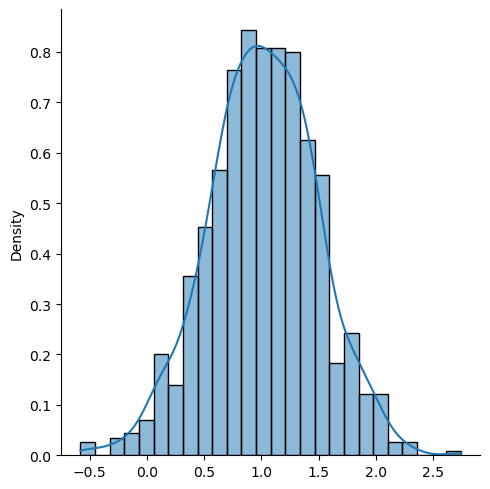

In [14]:
import seaborn as sns
sns.displot(data, kde=True, stat='density')

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

In [ ]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

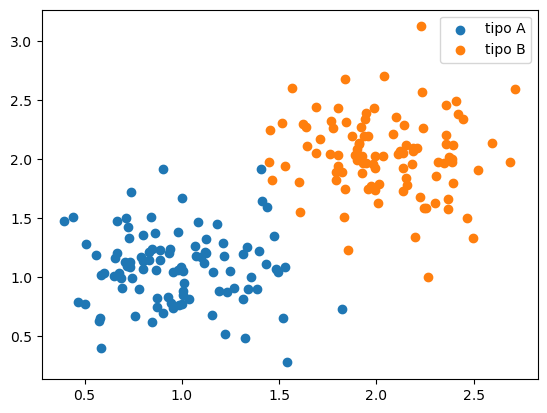

In [6]:
import numpy as np
import matplotlib.pyplot as plt


mean1 = 1
std1 = 0.3

arr1 = mean1 + std1 * np.random.randn(2,100)
x1 = arr1[0]
y1 = arr1[1]

mean2 = 2
std2 = 0.3

arr2 = mean2 + std2 * np.random.randn(2,100)
x2 = arr2[0]
y2 = arr2[1]

plt.scatter(x1,y1, label = 'tipo A')
plt.scatter(x2,y2, label = 'tipo B')

plt.legend()
plt.show()



3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [7]:
import pandas as pd

#loading dataset and converting it to a pandas dataframe
a = np.load(r"C:\Users\ASUS\LaboratoryOfComputationalPhysics_Y6\residuals_261.npy", allow_pickle=True)
df = pd.DataFrame(a.item())
print(df.size)


#Filtering the residual with abs value <2
df = df[df['residuals'] < 2]
print(df.size)

df = df[df['residuals'] > -2]
print(df.size)

22262
22194
20978


LinregressResult(slope=0.577913366635926, intercept=10.025258299436526, rvalue=0.043403510522559086, pvalue=8.717037183576464e-06, stderr=0.1298980963225655, intercept_stderr=0.05919737176060825)


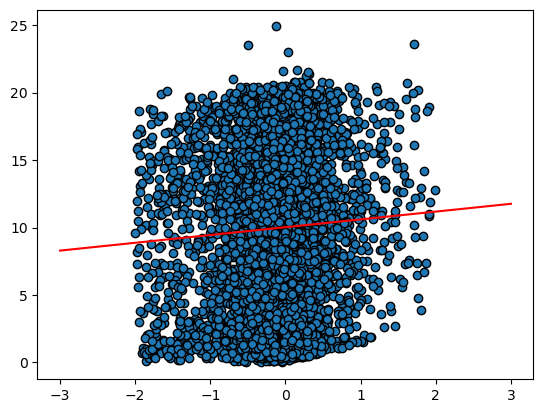

In [ ]:
from scipy.stats import linregress

lr = linregress(df['residuals'], df['distances'] )
print(lr)
slope = lr[0]
intercept = lr[1]

x = np.linspace(-3,3,100)
plt.plot(x, intercept + x * slope, color = 'red')

plt.scatter(df['residuals'],df['distances'],edgecolors='black')

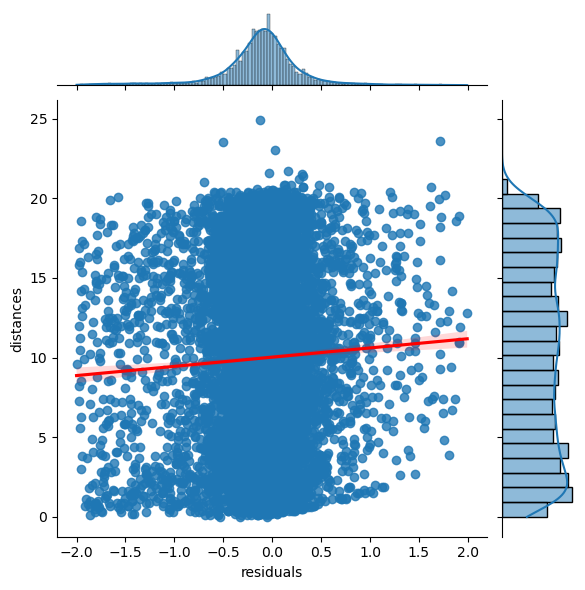

In [8]:
import seaborn as sns

sns.jointplot(x=df['residuals'], y=df['distances'], kind="reg", line_kws={'color':'red'} )

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22728\3368271419.py:18: RuntimeWarning: invalid value encountered in scalar divide
  y.append(df1['residuals'].sum() / df1['residuals'].shape[0])


Text(0.5, 0, 'distances')

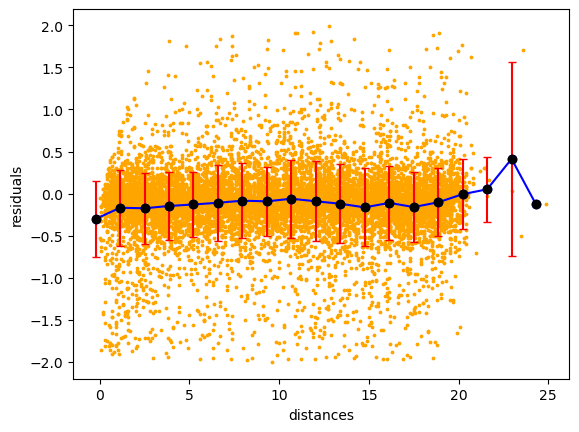

In [34]:
x = np.linspace(-5,25,23) #bin edges

#bin centers
centers = []
for i in range(1,x.shape[0]):
    centers.append((x[i-1]+x[i]) / 2)
centers = np.array(centers)

#residual means for each bin
y, erry = [], []
for i in range(1,x.shape[0]):
    #seleziono tutti i samples compresi dentro un bin di distanze
    df1 = df[df['distances'] > x[i-1]]

    df1 = df1[df1['distances'] < x[i]]

    #determino la media del valore dei residui dentro al bin
    y.append(df1['residuals'].sum() / df1['residuals'].shape[0])
    erry.append(df1['residuals'].std())
y = np.array(y)
erry = np.array(erry)

plt.errorbar(centers, y, yerr=erry, fmt='o', capsize=3, label='Error Bars', color ='black', ecolor='red')
plt.plot(centers, y, linestyle='-', marker='o', color='blue', label='Connected Line')

plt.scatter(df['distances'], df['residuals'], color = 'orange', s = 3)
plt.ylabel('residuals')
plt.xlabel('distances')